In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/AI_VIETNAM/AIO2023/ML/Non-Linear-Regression

/content/drive/MyDrive/AI_VIETNAM/AIO2023/ML/Non-Linear-Regression


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#1.Load Data

In [4]:
df = pd.read_csv('./data/Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
X = df.Level
X

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64

In [6]:
y = df.Salary
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

Text(0, 0.5, 'Salary')

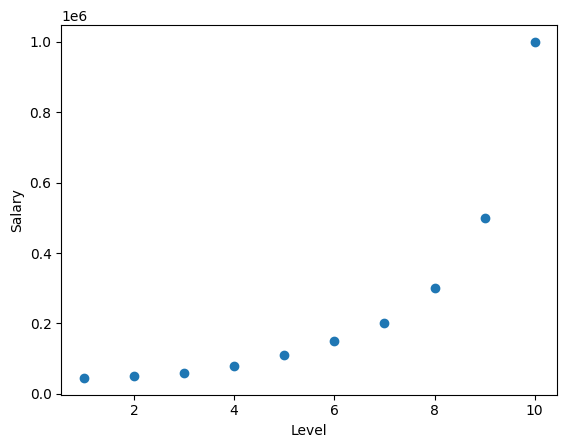

In [7]:
plt.scatter(X, y)
plt.xlabel("Level")
plt.ylabel("Salary")

#2.Linear Regression

In [8]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)

    r2 = 1 - (rss / tss)
    return r2

In [9]:
class LinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs=10000):
        self.X_data = X_data
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_samples = self.X_data.shape[0]

        # Initial Coefficients
        self.theta = np.random.randn(self.X_data.shape[1])
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        loss = (y_pred-y_target)*(y_pred-y_target)
        loss = np.mean(loss)
        return loss

    def predict(self, X_data):
        y_pred = X_data.dot(self.theta)
        return y_pred

    def fit(self):
        for epoch in range(self.num_epochs):
            # predict
            y_pred = self.predict(self.X_data)

            # compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            # compute gradient
            k = 2*(y_pred-self.y_target)
            gradients = self.X_data.T.dot(k)/self.num_samples

            # update weight
            self.theta = self.theta - self.learning_rate*gradients

            print(f'Epoch: {epoch} - Loss: {loss}')

        return {
            'loss': sum(self.losses)/len(self.losses),
            'weight': self.theta
        }

In [10]:
X_linear = X.values.reshape(-1, 1)
X_linear = np.hstack((np.ones((X_linear.shape[0], 1)), X_linear))

In [11]:
X_linear

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [12]:
linear_model = LinearRegression(X_linear, y)
linear_model.fit()

Streaming output truncated to the last 5000 lines.
Epoch: 5000 - Loss: 26695878787.878784
Epoch: 5001 - Loss: 26695878787.87879
Epoch: 5002 - Loss: 26695878787.878784
Epoch: 5003 - Loss: 26695878787.878784
Epoch: 5004 - Loss: 26695878787.878788
Epoch: 5005 - Loss: 26695878787.87879
Epoch: 5006 - Loss: 26695878787.878784
Epoch: 5007 - Loss: 26695878787.87879
Epoch: 5008 - Loss: 26695878787.878788
Epoch: 5009 - Loss: 26695878787.878796
Epoch: 5010 - Loss: 26695878787.87879
Epoch: 5011 - Loss: 26695878787.87879
Epoch: 5012 - Loss: 26695878787.87879
Epoch: 5013 - Loss: 26695878787.878788
Epoch: 5014 - Loss: 26695878787.87879
Epoch: 5015 - Loss: 26695878787.87878
Epoch: 5016 - Loss: 26695878787.878784
Epoch: 5017 - Loss: 26695878787.87879
Epoch: 5018 - Loss: 26695878787.87879
Epoch: 5019 - Loss: 26695878787.87879
Epoch: 5020 - Loss: 26695878787.87878
Epoch: 5021 - Loss: 26695878787.878784
Epoch: 5022 - Loss: 26695878787.87879
Epoch: 5023 - Loss: 26695878787.878788
Epoch: 5024 - Loss: 266958

{'loss': 26812263483.51581,
 'weight': array([-195333.33333333,   80878.78787879])}

In [13]:
y_pred = linear_model.predict(X_linear)

In [14]:
r2score(y_pred, y)

0.6690412331929895

In [15]:
linear_model.theta

array([-195333.33333333,   80878.78787879])

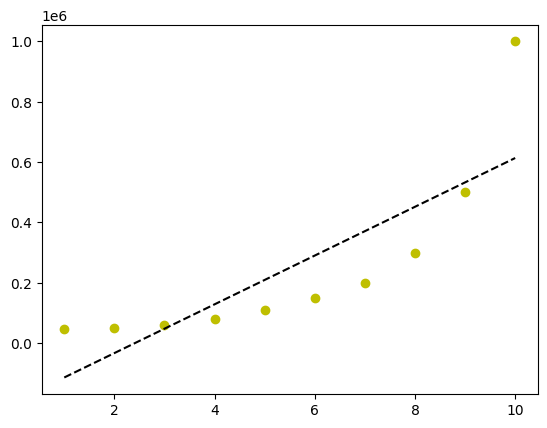

In [16]:
plt.plot(X, y, 'yo', X, linear_model.theta[1]*X + linear_model.theta[0], '--k')
plt.show()

#3.Polymial Regression

In [17]:
def create_polynomial_features(X, degree=2):
    """Creates the polynomial features
    Args:
        X: A array tensor for the data.
        degree: A intege for the degree of
        the generated polynomial function.
    """
    X_new = X
    for d in range(2, degree+1):
        X_new = np.c_[X_new, np.power(X, d)]
    return X_new

##3.1.Polymial Regression with degree = 2

In [18]:
X_poly = create_polynomial_features(X, degree=2)
X_poly

array([[  1,   1],
       [  2,   4],
       [  3,   9],
       [  4,  16],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100]])

In [19]:
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [21]:
poly_model = LinearRegression(X_poly, y, learning_rate=0.0001, num_epochs=10000)
poly_model.fit()

Streaming output truncated to the last 5000 lines.
Epoch: 5000 - Loss: 10675940833.168211
Epoch: 5001 - Loss: 10675820982.83516
Epoch: 5002 - Loss: 10675701158.42836
Epoch: 5003 - Loss: 10675581359.922483
Epoch: 5004 - Loss: 10675461587.292225
Epoch: 5005 - Loss: 10675341840.512302
Epoch: 5006 - Loss: 10675222119.557468
Epoch: 5007 - Loss: 10675102424.402496
Epoch: 5008 - Loss: 10674982755.022198
Epoch: 5009 - Loss: 10674863111.391397
Epoch: 5010 - Loss: 10674743493.484955
Epoch: 5011 - Loss: 10674623901.277756
Epoch: 5012 - Loss: 10674504334.74471
Epoch: 5013 - Loss: 10674384793.860764
Epoch: 5014 - Loss: 10674265278.600876
Epoch: 5015 - Loss: 10674145788.940039
Epoch: 5016 - Loss: 10674026324.853277
Epoch: 5017 - Loss: 10673906886.315634
Epoch: 5018 - Loss: 10673787473.30218
Epoch: 5019 - Loss: 10673668085.788025
Epoch: 5020 - Loss: 10673548723.748285
Epoch: 5021 - Loss: 10673429387.158123
Epoch: 5022 - Loss: 10673310075.992708
Epoch: 5023 - Loss: 10673190790.227253
Epoch: 5024 - Los

{'loss': 11093692040.159513,
 'weight': array([ 14601.50496615, -47838.37681542,  12584.36178789])}

In [22]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

0.8736082800402859

In [23]:
poly_model.theta

array([ 14601.50496615, -47838.37681542,  12584.36178789])

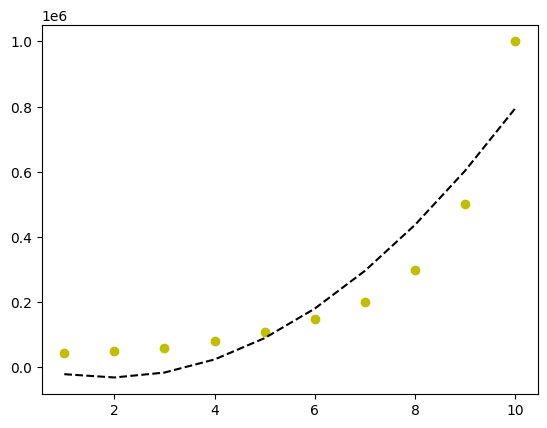

In [24]:
X_plot = df.Level
y_func = poly_model.theta[2]*X*X + poly_model.theta[1]*X + poly_model.theta[0]
plt.plot(X_plot, y, 'yo', X, y_func, '--k')
plt.show()

##3.2.Polymial Regression with degree = 3

In [26]:
X_poly = create_polynomial_features(X, degree=3)
X_poly

array([[   1,    1,    1],
       [   2,    4,    8],
       [   3,    9,   27],
       [   4,   16,   64],
       [   5,   25,  125],
       [   6,   36,  216],
       [   7,   49,  343],
       [   8,   64,  512],
       [   9,   81,  729],
       [  10,  100, 1000]])

In [27]:
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [29]:
poly_model = LinearRegression(X_poly, y, learning_rate=0.0000001, num_epochs=10000)
poly_model.fit()

Streaming output truncated to the last 5000 lines.
Epoch: 5000 - Loss: 6801989125.633406
Epoch: 5001 - Loss: 6801948115.347879
Epoch: 5002 - Loss: 6801907106.250937
Epoch: 5003 - Loss: 6801866098.34255
Epoch: 5004 - Loss: 6801825091.622677
Epoch: 5005 - Loss: 6801784086.091295
Epoch: 5006 - Loss: 6801743081.74836
Epoch: 5007 - Loss: 6801702078.593842
Epoch: 5008 - Loss: 6801661076.627693
Epoch: 5009 - Loss: 6801620075.849896
Epoch: 5010 - Loss: 6801579076.260403
Epoch: 5011 - Loss: 6801538077.859181
Epoch: 5012 - Loss: 6801497080.646213
Epoch: 5013 - Loss: 6801456084.621439
Epoch: 5014 - Loss: 6801415089.784831
Epoch: 5015 - Loss: 6801374096.136363
Epoch: 5016 - Loss: 6801333103.675984
Epoch: 5017 - Loss: 6801292112.403682
Epoch: 5018 - Loss: 6801251122.3194
Epoch: 5019 - Loss: 6801210133.423119
Epoch: 5020 - Loss: 6801169145.714792
Epoch: 5021 - Loss: 6801128159.194387
Epoch: 5022 - Loss: 6801087173.86187
Epoch: 5023 - Loss: 6801046189.717211
Epoch: 5024 - Loss: 6801005206.760369
Epoc

{'loss': 6979002935.670188,
 'weight': array([   2.76058432,  -98.95931939, -534.83124533,  889.75993787])}

In [30]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

0.9180398621695772

In [31]:
poly_model.theta

array([   2.76058432,  -98.95931939, -534.83124533,  889.75993787])

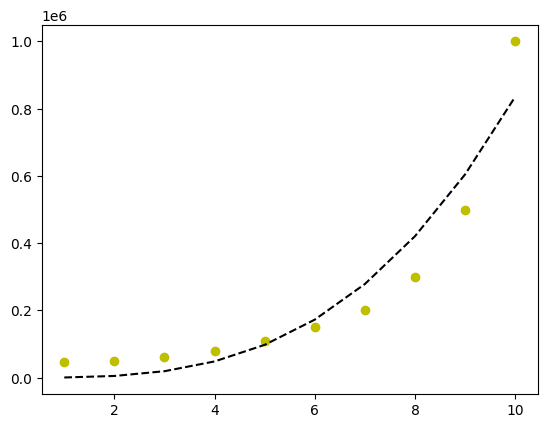

In [32]:
X_plot = df.Level
y_func = poly_model.theta[3]*X*X*X + poly_model.theta[2]*X*X + poly_model.theta[1]*X + poly_model.theta[0]
plt.plot(X_plot, y, 'yo', X, y_func, '--k')
plt.show()